In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

%matplotlib inline

## Binary morphology
The function $\textit{get_members_CROSS}$ and $\textit{get_members_SQUARE}$ returns a ist of valid neighbhours for a given Binary Window and specific pixel position.\
The function $\textit{DILATE}$ applied OR operation for each pixel with it's corresponding windowed neighbours.\
The function $\textit{ERODE}$ applied AND operation for each pixel with it's corresponding windowed neighbours.\
The function $\textit{MEDIAN}$ applied max count operation for each pixel with it's corresponding windowed neighbours.\
Here APC, Airport, Airplane and Truck images are used.\
$\textit{WINDOWS}$ are defined as dict(), i.e, {'CROSS':N} implies CROSS(N)

### Question 1

In [3]:
def get_members_CROSS(i, j, shape, N):
    members = []
    A = N//2
    (m, n) = shape
    for k in range(-1*A, A+1):
        if(i>=k and m > (i-k)):
            members.append([i-k, j])
        else:
            members.append([i, j])
        if(j>=k and n > (j-k) and k!=0):
            members.append([i, j-k])
        else:
            members.append([i, j])
    return members

def get_members_SQUARE(i, j, shape, N):
    members = []
    A = N//2
    (m, n) = shape
    for p in range(-1*A, A+1):
        for q in range(-1*A, A+1):
            if((i-p)>=0 and (i-p)<m and (j-q)>=0 and (j-q)<n):
                members.append([i-p, j-q])
            else:
                members.append([i, j])
        
    return members

def DILATE(I, B):
    Image = I.copy()
    m, n = Image.shape
    if [*B][0] == 'CROSS':
        for i in range(m):
            for j in range(n):
                members = get_members_CROSS(i, j, Image.shape, B[[*B][0]])
                ans = False
                for member in members:
                    ans = ans or (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
        
    elif [*B][0] == 'SQUARE':
        for i in range(m):
            for j in range(n):
                members = get_members_SQUARE(i, j, Image.shape, B[[*B][0]])
                ans = False
                for member in members:
                    ans = ans or (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
    return Image

def ERODE(I, B):
    Image = I.copy()
    m, n = Image.shape
    if [*B][0] == 'CROSS':
        for i in range(m):
            for j in range(n):
                members = get_members_CROSS(i, j, Image.shape, B[[*B][0]])
                ans = True
                for member in members:
                    ans = ans and (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
        
    elif [*B][0] == 'SQUARE':
        for i in range(m):
            for j in range(n):
                members = get_members_SQUARE(i, j, Image.shape, B[[*B][0]])
                ans = True
                for member in members:
                    ans = ans and (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
    return Image

def MEDIAN(I, B):
    Image = I.copy()
    m, n = Image.shape
    if [*B][0] == 'CROSS':
        for i in range(m):
            for j in range(n):
                members = get_members_CROSS(i, j, Image.shape, B[[*B][0]])
                count = [0, 0]
                for member in members:
                    if(Image[member[0], member[1]] == 0):
                        count[0] += 1
                    else:
                        count[1] += 1
                Image[i, j] = 0 if (count[0] > count[1]) else 1
        
    elif [*B][0] == 'SQUARE':
        for i in range(m):
            for j in range(n):
                members = get_members_SQUARE(i, j, Image.shape, B[[*B][0]])
                count = [0, 0]
                for member in members:
                    if(Image[member[0], member[1]] == 0):
                        count[0] += 1
                    else:
                        count[1] += 1
                Image[i, j] = 0 if (count[0] > count[1]) else 1
    return Image

In [2]:
bin_apc = mpimg.imread('apc.png')
bin_airport = mpimg.imread('airport.png')
bin_airplane = mpimg.imread('airplane.png')
bin_truck = mpimg.imread('truck.png')

### DILATE

In [125]:
bin_apc_dia_cr = DILATE(bin_apc, {'CROSS': 5})
bin_apc_dia_sq = DILATE(bin_apc, {'SQUARE': 3})

bin_airport_dia_cr = DILATE(bin_airport, {'CROSS': 5})
bin_airport_dia_sq = DILATE(bin_airport, {'SQUARE': 3})

bin_airplane_dia_cr = DILATE(bin_airplane, {'CROSS': 5})
bin_airplane_dia_sq = DILATE(bin_airplane, {'SQUARE': 3})

bin_truck_dia_cr = DILATE(bin_truck, {'CROSS': 5})
bin_truck_dia_sq = DILATE(bin_truck, {'SQUARE': 3})

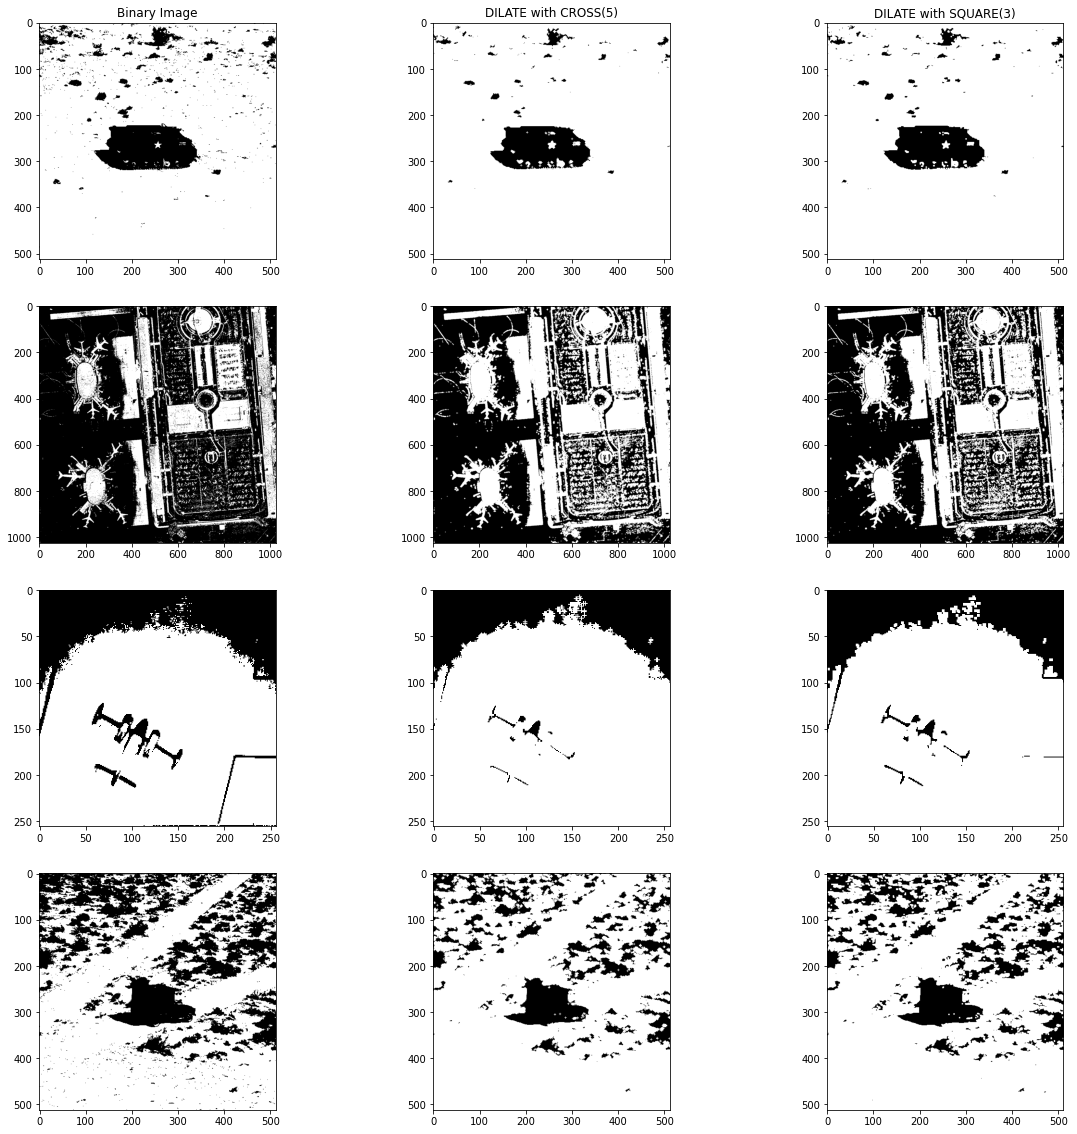

In [126]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("DILATE with CROSS(5)")
plt.imshow(bin_apc_dia_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("DILATE with SQUARE(3)")
plt.imshow(bin_apc_dia_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_dia_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_dia_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_dia_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_dia_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_dia_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_dia_sq, cmap='gray')

### ERODE

In [127]:
bin_apc_ero_cr = ERODE(bin_apc, {'CROSS': 5})
bin_apc_ero_sq = ERODE(bin_apc, {'SQUARE': 3})

bin_airport_ero_cr = ERODE(bin_airport, {'CROSS': 5})
bin_airport_ero_sq = ERODE(bin_airport, {'SQUARE': 3})

bin_airplane_ero_cr = ERODE(bin_airplane, {'CROSS': 5})
bin_airplane_ero_sq = ERODE(bin_airplane, {'SQUARE': 3})

bin_truck_ero_cr = ERODE(bin_truck, {'CROSS': 5})
bin_truck_ero_sq = ERODE(bin_truck, {'SQUARE': 3})

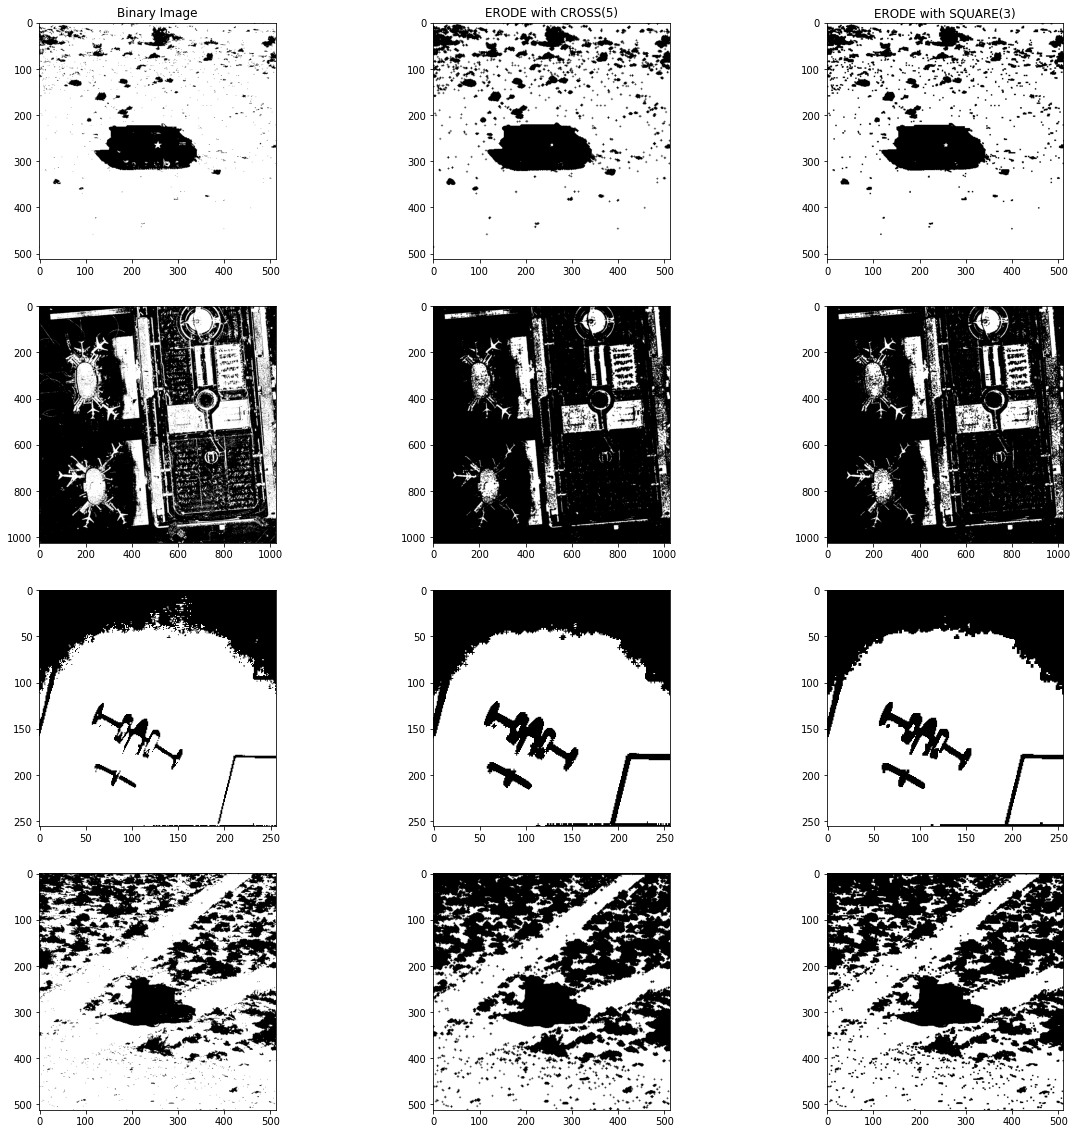

In [128]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("ERODE with CROSS(5)")
plt.imshow(bin_apc_ero_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("ERODE with SQUARE(3)")
plt.imshow(bin_apc_ero_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_ero_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_ero_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_ero_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_ero_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_ero_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_ero_sq, cmap='gray')

### MEDIAN

In [129]:
bin_apc_mea_cr = MEDIAN(bin_apc, {'CROSS': 5})
bin_apc_mea_sq = MEDIAN(bin_apc, {'SQUARE': 3})

bin_airport_mea_cr = MEDIAN(bin_airport, {'CROSS': 5})
bin_airport_mea_sq = MEDIAN(bin_airport, {'SQUARE': 3})

bin_airplane_mea_cr = MEDIAN(bin_airplane, {'CROSS': 5})
bin_airplane_mea_sq = MEDIAN(bin_airplane, {'SQUARE': 3})

bin_truck_mea_cr = MEDIAN(bin_truck, {'CROSS': 5})
bin_truck_mea_sq = MEDIAN(bin_truck, {'SQUARE': 3})

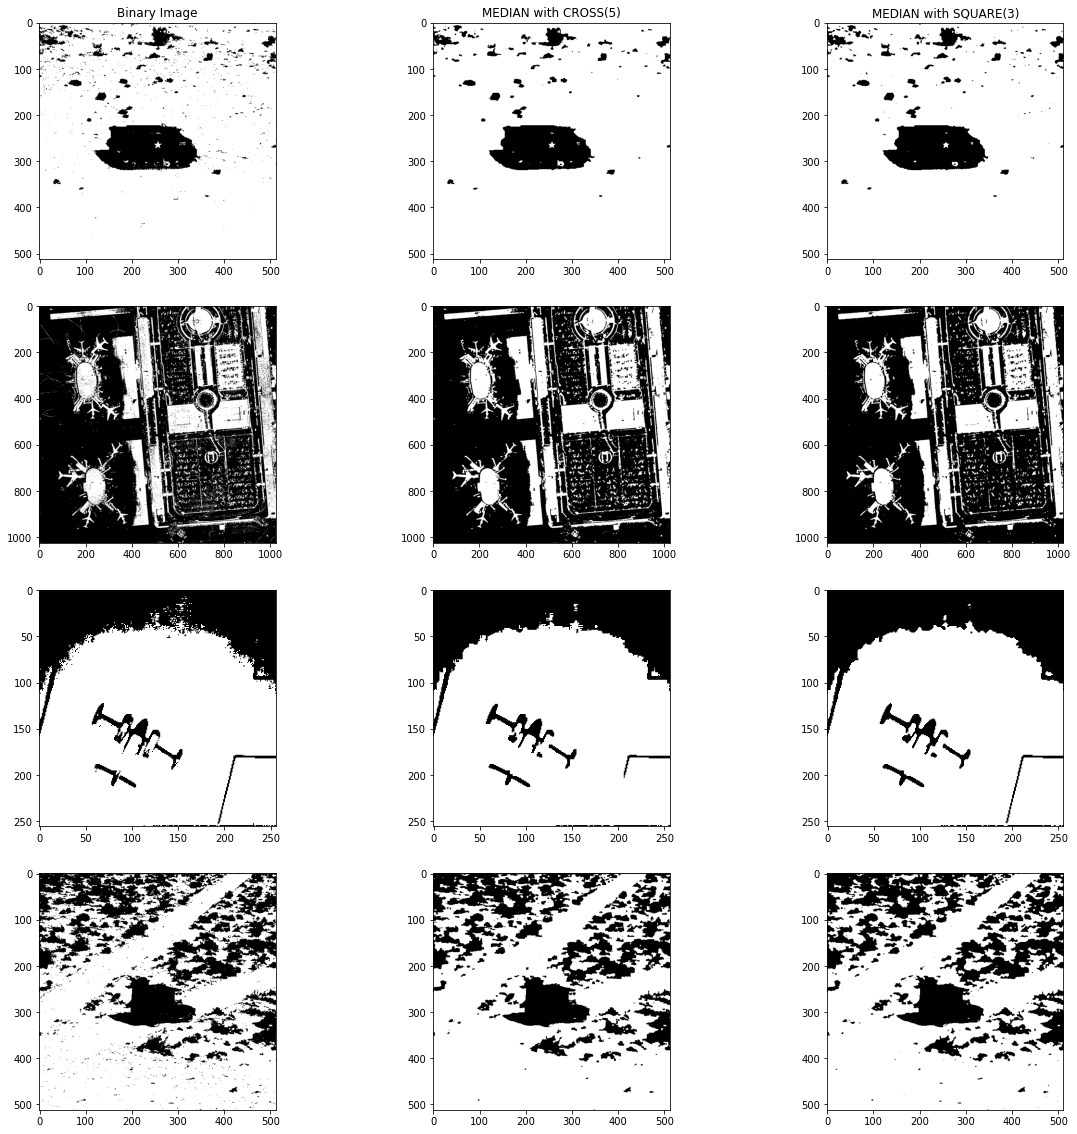

In [130]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("MEDIAN with CROSS(5)")
plt.imshow(bin_apc_mea_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("MEDIAN with SQUARE(3)")
plt.imshow(bin_apc_mea_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_mea_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_mea_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_mea_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_mea_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_mea_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_mea_sq, cmap='gray')

### Question 2

### Duality verification of DILATE and ERODE
#### (a) DILATE = NOT(ERODE(NOT))

In [4]:
def NOT(I):
    Image = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if(I[i, j]==0):
                Image[i, j] = 1
            else:
                Image[i, j] = 0
    return Image

Difference between direct and complement path is zero.


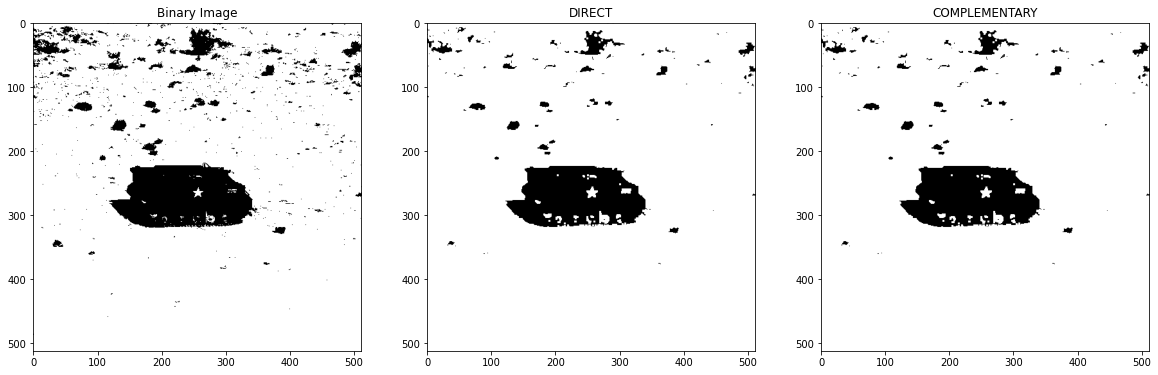

In [132]:
bin_apc_dia_c = NOT(ERODE(NOT(bin_apc), {'SQUARE':3}))
if np.all(bin_apc_dia_sq == bin_apc_dia_c):
    print("Difference between direct and complement path is zero.")
else:
    print("Difference between direct and complement path is not zero.")
    
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("DIRECT")
plt.imshow(bin_apc_dia_sq, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("COMPLEMENTARY")
plt.imshow(bin_apc_dia_c, cmap='gray')

#### (b) ERODE = NOT(DILATE(NOT))

Difference between direct and complement path is zero.


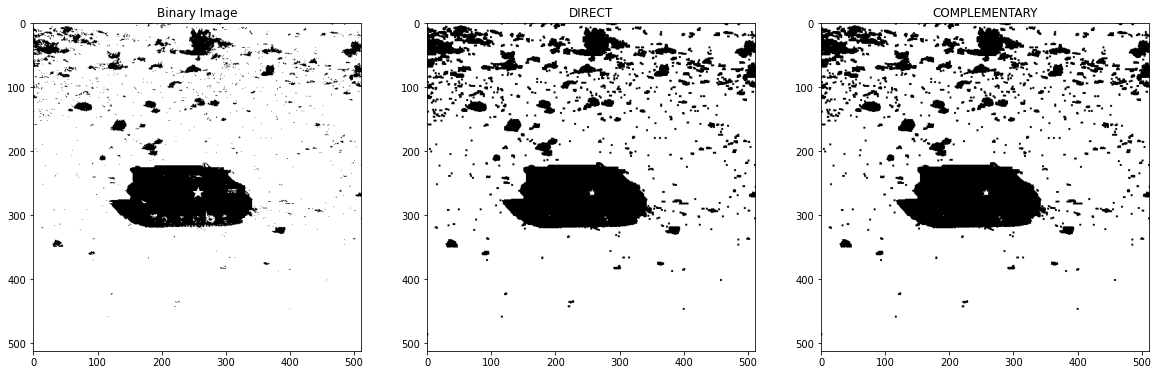

In [133]:
bin_apc_ero_c = NOT(DILATE(NOT(bin_apc), {'SQUARE':3}))
if np.all(bin_apc_ero_sq == bin_apc_ero_c):
    print("Difference between direct and complement path is zero.")
else:
    print("Difference between direct and complement path is not zero.")
    
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("DIRECT")
plt.imshow(bin_apc_ero_sq, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("COMPLEMENTARY")
plt.imshow(bin_apc_ero_c, cmap='gray')

#### (c) MEDIAN = NOT(MEDIAN(NOT))

Difference between direct and complement path is zero.


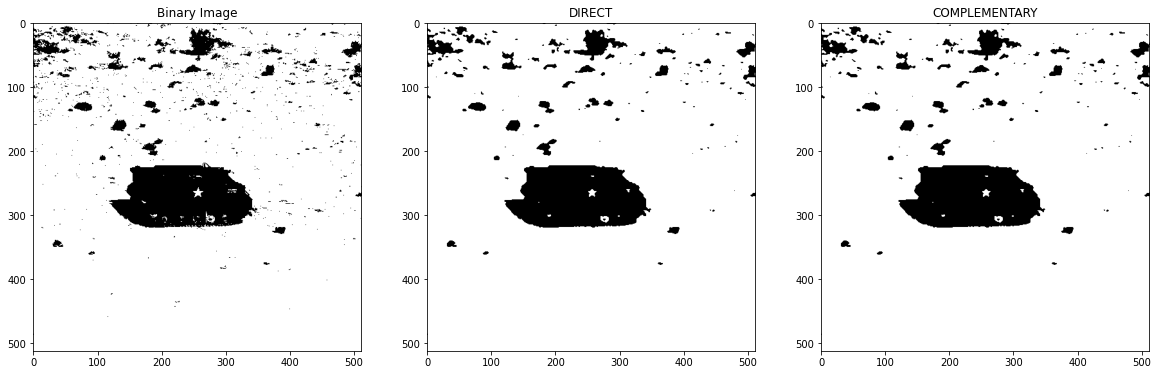

In [134]:
bin_apc_mea_c = NOT(MEDIAN(NOT(bin_apc), {'SQUARE':3}))
if np.all(bin_apc_mea_sq == bin_apc_mea_c):
    print("Difference between direct and complement path is zero.")
else:
    print("Difference between direct and complement path is not zero.")
    
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("DIRECT")
plt.imshow(bin_apc_mea_sq, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("COMPLEMENTARY")
plt.imshow(bin_apc_mea_c, cmap='gray')

In above cells we verify the duality of DILATE-ERODE, ERODE-DILATE, and Self-Duality of MEDIAN

### Question 3

### OPEN & CLOSE

In [5]:
def OPEN(I, B):
    return DILATE(ERODE(I, B), B)

def CLOSE(I, B):
    return ERODE(DILATE(I, B), B)

In [136]:
bin_apc_ope_cr = OPEN(bin_apc, {'CROSS': 5})
bin_apc_ope_sq = OPEN(bin_apc, {'SQUARE': 3})

bin_airport_ope_cr = OPEN(bin_airport, {'CROSS': 5})
bin_airport_ope_sq = OPEN(bin_airport, {'SQUARE': 3})

bin_airplane_ope_cr = OPEN(bin_airplane, {'CROSS': 5})
bin_airplane_ope_sq = OPEN(bin_airplane, {'SQUARE': 3})

bin_truck_ope_cr = OPEN(bin_truck, {'CROSS': 5})
bin_truck_ope_sq = OPEN(bin_truck, {'SQUARE': 3})

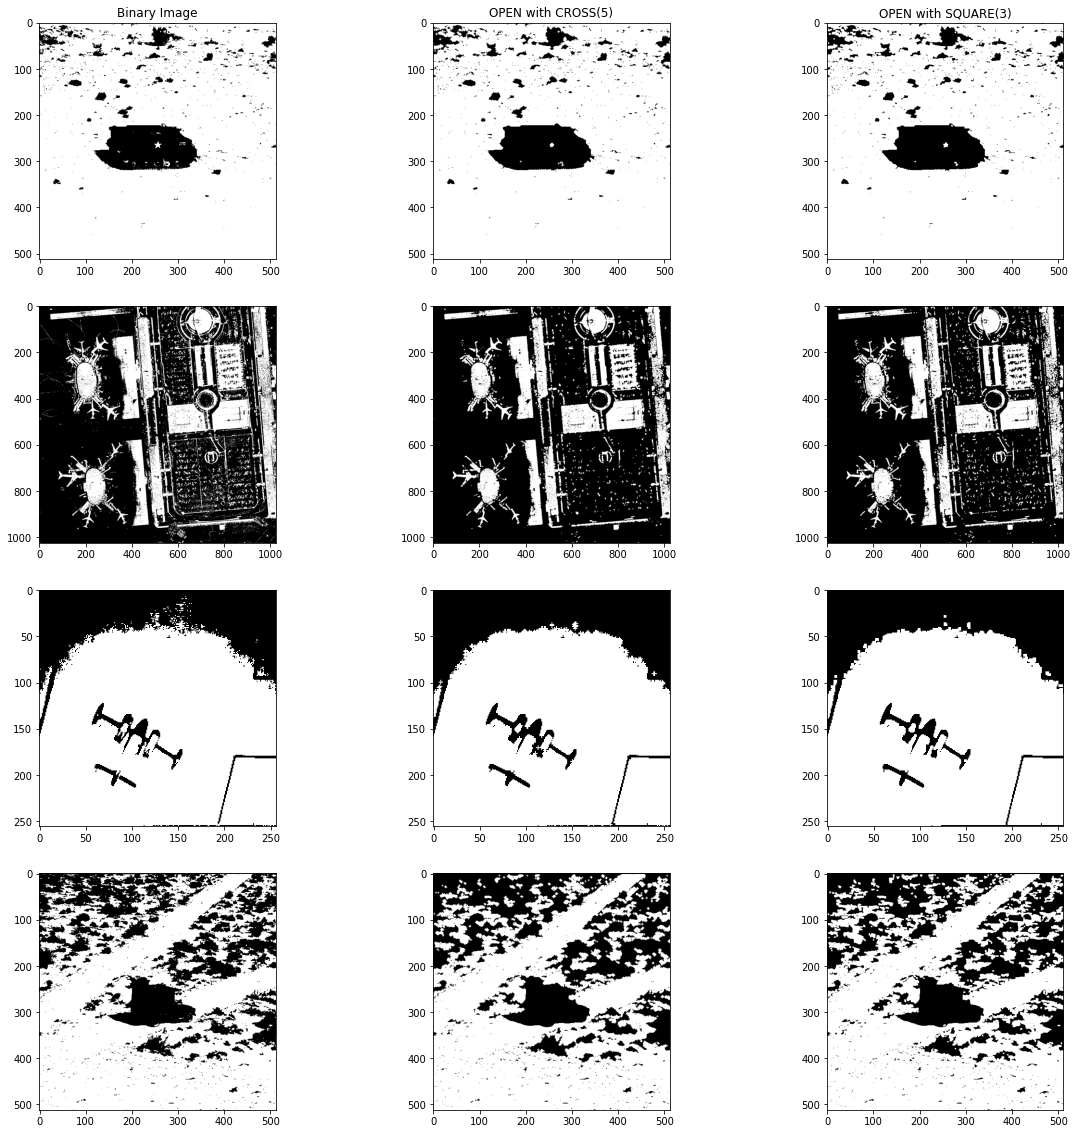

In [137]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("OPEN with CROSS(5)")
plt.imshow(bin_apc_ope_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("OPEN with SQUARE(3)")
plt.imshow(bin_apc_ope_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_ope_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_ope_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_ope_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_ope_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_ope_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_ope_sq, cmap='gray')

In [138]:
bin_apc_clo_cr = CLOSE(bin_apc, {'CROSS': 5})
bin_apc_clo_sq = CLOSE(bin_apc, {'SQUARE': 3})

bin_airport_clo_cr = CLOSE(bin_airport, {'CROSS': 5})
bin_airport_clo_sq = CLOSE(bin_airport, {'SQUARE': 3})

bin_airplane_clo_cr = CLOSE(bin_airplane, {'CROSS': 5})
bin_airplane_clo_sq = CLOSE(bin_airplane, {'SQUARE': 3})

bin_truck_clo_cr = CLOSE(bin_truck, {'CROSS': 5})
bin_truck_clo_sq = CLOSE(bin_truck, {'SQUARE': 3})

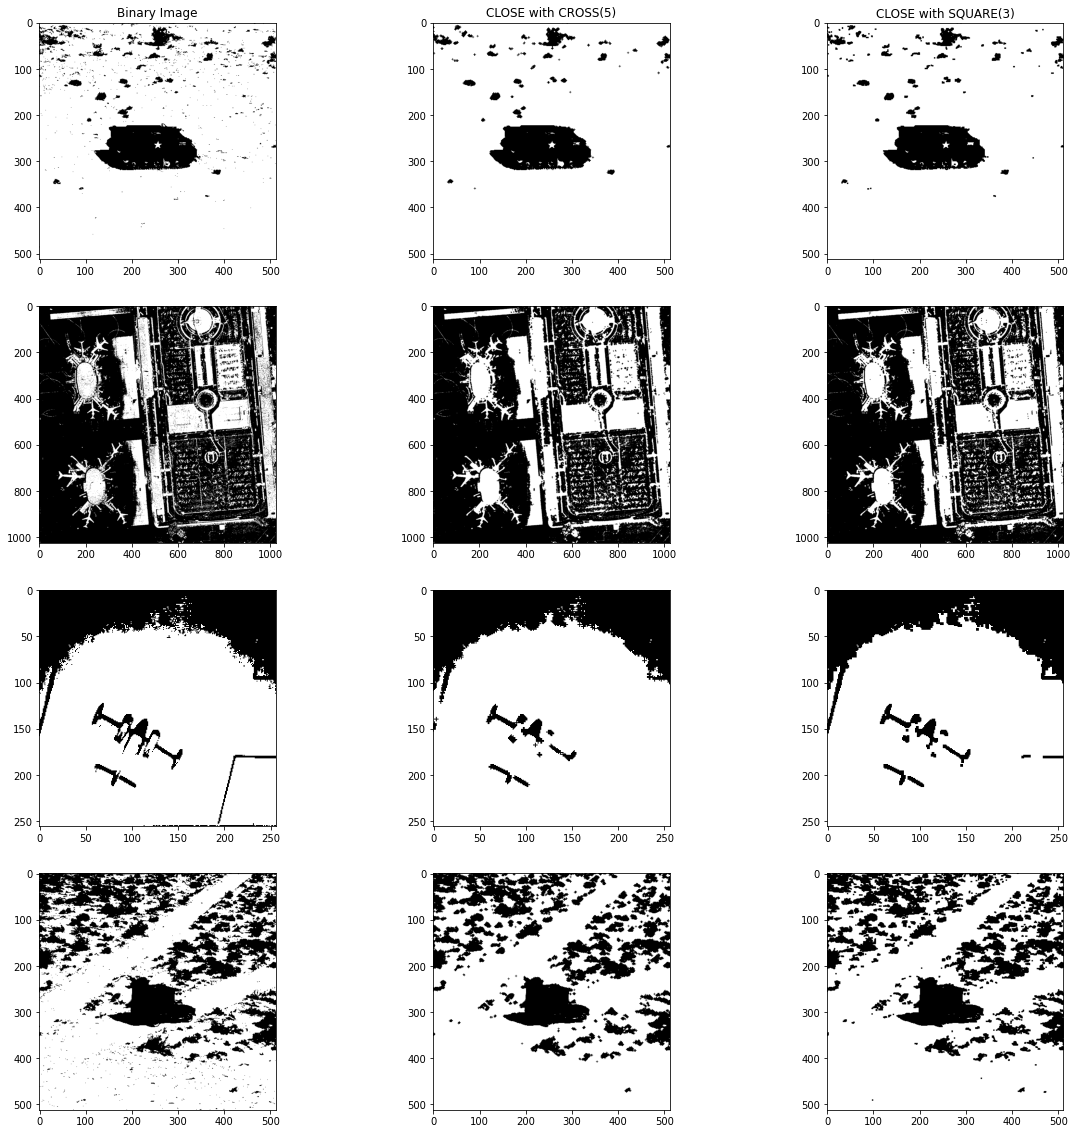

In [139]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("CLOSE with CROSS(5)")
plt.imshow(bin_apc_clo_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("CLOSE with SQUARE(3)")
plt.imshow(bin_apc_clo_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_clo_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_clo_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_clo_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_clo_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_clo_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_clo_sq, cmap='gray')

In [140]:
bin_apc_ope_clo_cr = OPEN(CLOSE(bin_apc, {'CROSS':5}), {'CROSS':5})
bin_apc_ope_clo_sq = OPEN(CLOSE(bin_apc, {'SQUARE':3}), {'SQUARE':3})

bin_apc_clo_sq_cr = CLOSE(OPEN(bin_apc, {'CROSS':5}), {'CROSS':5})
bin_apc_clo_sq_sq = CLOSE(OPEN(bin_apc, {'SQUARE':3}), {'SQUARE':3})

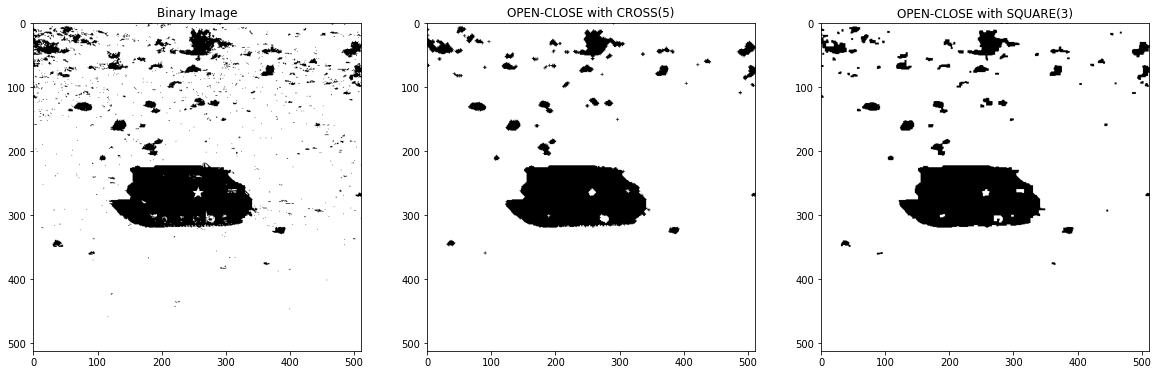

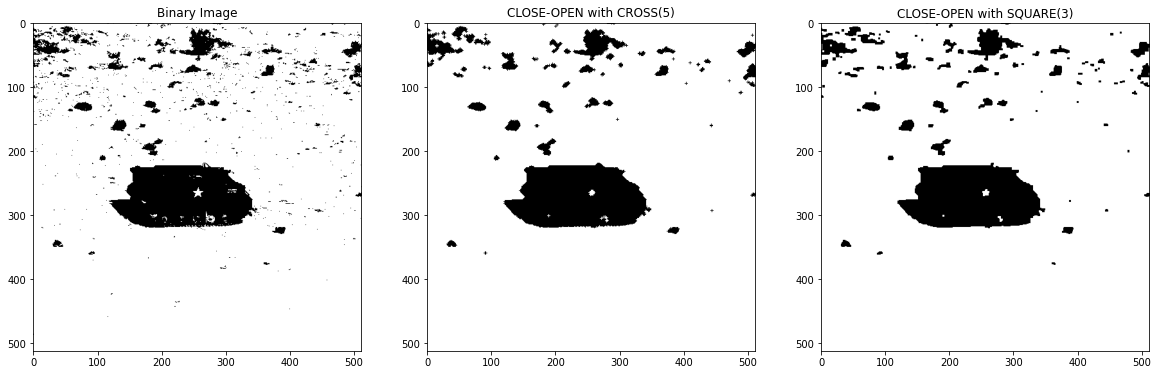

In [155]:
plt.figure()

plt.subplot(1, 3, 1)
plt.title('Binary Image')
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('OPEN-CLOSE with CROSS(5)')
plt.imshow(bin_apc_ope_clo_cr, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('OPEN-CLOSE with SQUARE(3)')
plt.imshow(bin_apc_ope_clo_sq, cmap='gray')

plt.figure()

plt.subplot(1, 3, 1)
plt.title('Binary Image')
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('CLOSE-OPEN with CROSS(5)')
plt.imshow(bin_apc_clo_sq_cr, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('CLOSE-OPEN with SQUARE(3)')
plt.imshow(bin_apc_clo_sq_sq, cmap='gray')

##### The below cell is inherited from Assignment 1.

In [21]:
def complement(bin_I):
    c_bin_I = bin_I.copy()
    for i in range(c_bin_I.shape[0]):
        for j in range(c_bin_I.shape[1]):
            c_bin_I[i, j] = 1 - c_bin_I[i, j]
    return c_bin_I

def get_neighbours(i, j, labels):
    M, N = labels.shape
    neighbours = []
    if(i>=1):
        neighbours.append(labels[i-1, j])
    if(j>=1):
        neighbours.append(labels[i, j-1])
    if(i<(M-1)):
        neighbours.append(labels[i+1, j])
    if(j<(N-1)):
        neighbours.append(labels[i, j+1])
     
    return neighbours

def find_set(x, disjoint_set):
    rep = min(disjoint_set[x])
    while x != rep:
        x = rep
        rep = min(disjoint_set[x])
    return rep
    
def connected_component(bin_I):
    M, N = bin_I.shape
    R = np.zeros((M, N), dtype=np.int32)
    k = 1
    disjoint_set = {}
    for i in range(M):
        for j in range(N):
            if(bin_I[i, j] == 1):
                neighbours = get_neighbours(i, j, R)
                neighbours = list(filter(lambda x: x != 0, neighbours))
                
                if(len(neighbours) == 0):
                    R[i, j] = k
                    disjoint_set[k] = set([k])
                    k += 1
                else:
                    minLabel = min(neighbours)
                    R[i, j] = minLabel
                    for neighbour in neighbours:
                        disjoint_set[neighbour] = set.union(disjoint_set[neighbour], neighbours)
    R_final = {}
    k = 1
    for i in range(M):
        for j in range(N):
            if(R[i, j] != 0):
                new_k = find_set(R[i, j], disjoint_set)
                R[i, j] = new_k
                
                if new_k not in R_final:
                    R_final[new_k] = k
                    k += 1
    
    for i in range(M):
        for j in range(N):
            if(R[i, j] != 0):
                R[i, j] = R_final[R[i, j]]
    return R
def max_blob_count(bin_I):
    R = connected_component(bin_I)
    
    (label, count) = np.unique(R.ravel(), return_counts=True)
    
    m = label[np.argmax(count)] ## Maximum blob label
    
    return count[m]
def minor_blob_removal(I, R,plot=False):
    (label, count) = np.unique(R.ravel(), return_counts=True)
    
    I_c = complement(I)  ## Complementing the given binary image
    m = label[np.argmax(count)] ## Maximum blob label
    
    new_I = I_c.copy()
    for i in range(new_I.shape[0]):
        for j in range(new_I.shape[1]):
            if(new_I[i, j]==0 and R[i, j]!=m):
                new_I[i, j] = 1
                
    new_I = complement(new_I) ## Complementing back the modified binary image
    
    if plot == True:
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(I, cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title("After Minor blob removal")
        plt.imshow(new_I, cmap="gray")
    return new_I

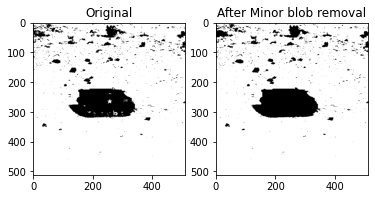

In [64]:
R_apc = connected_component(bin_apc)

bin_img_apc_mbr = minor_blob_removal(bin_apc, R_apc, plot=False)

bin_img_apc_mbr_not = NOT(bin_img_apc_mbr)

R_apc_1 = connected_component(bin_img_apc_mbr_not)

## Calculating Area
(label, count) = np.unique(R_apc_1, return_counts=True)
size = np.max(count[1:])

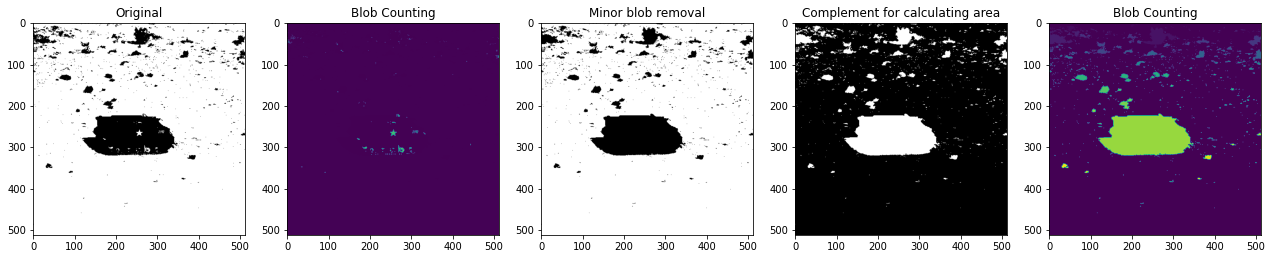

In [72]:
plt.rcParams["figure.figsize"] = (22,12)

plt.subplot(1, 5, 1)
plt.title("Original")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 5, 2)
plt.title("Blob Counting")
plt.imshow(R_apc)

plt.subplot(1, 5, 3)
plt.title("Minor blob removal")
plt.imshow(bin_img_apc_mbr, cmap='gray')

plt.subplot(1, 5, 4)
plt.title("Complement for calculating area")
plt.imshow(bin_img_apc_mbr_not, cmap='gray')

plt.subplot(1, 5, 5)
plt.title("Blob Counting")
plt.imshow(R_apc_1)

In [66]:
print("The pixel count of military vehicle is {}".format(size))

The pixel count of military vehicle is 17134


## Gray Scale Point Operations

### Question 1
Here we are using openCV for importing RGB image and converting it to GRAYSCALE.\
The below are the hyperlinks to the images used in further cells. 
- <a href="https://apod.nasa.gov/apod/ap210720.html" target="_blank">nasa_1.jpg</a>
- <a href="https://apod.nasa.gov/apod/ap210822.html" target="_blank">nasa_2.jpg</a>
- <a href="https://apod.nasa.gov/apod/ap210910.html" target="_blank">nasa_3.jpg</a>
- <a href="https://apod.nasa.gov/apod/ap210718.html" target="_blank">nasa_4.jpg</a>

In [25]:
import cv2

img_nasa_1 = cv2.imread('nasa_1.jpg', cv2.IMREAD_GRAYSCALE)
img_nasa_2 = cv2.imread('nasa_2.jpg', cv2.IMREAD_GRAYSCALE)
img_nasa_3 = cv2.imread('nasa_3.jpg', cv2.IMREAD_GRAYSCALE)
img_nasa_4 = cv2.imread('nasa_4.jpg', cv2.IMREAD_GRAYSCALE)

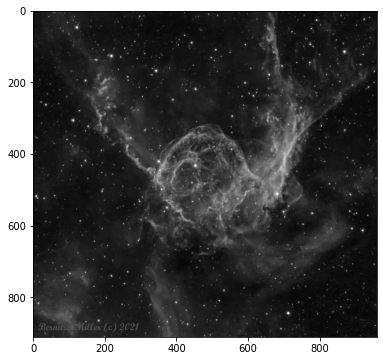

In [26]:
plt.rcParams["figure.figsize"] = (8,6)
plt.imshow(img_nasa_1, cmap='gray')

The function $\textit{linear_point}$ performs linear operation on grayscale images, function $\textit{histogram}$ is inherited from Assignment 1.

In [27]:
def histogram(I):
    Nbits = int(np.ceil(np.log2(np.max(I))))
    counter = np.zeros(2**Nbits)
    
    for i in I.ravel():
        counter[i] += 1
    return np.array([np.arange(2**Nbits), counter]) 

def linear_point(I, P, L):
    return np.clip(P*I + L, 0, 255).astype(int)

The following parameters are been used.
- $\textbf{P}$ = 2
- $\textbf{L}$ = 20

In [29]:
P = 2
L = 20

bin_nasa_1_a = linear_point(img_nasa_1, P, 0)
bin_nasa_1_b = linear_point(img_nasa_1, 1, L)
bin_nasa_1_c = linear_point(img_nasa_1, P, L)

In [44]:

hist_nasa_1 = histogram(img_nasa_1)
hist_nasa_1_a = histogram(bin_nasa_1_a)
hist_nasa_1_b = histogram(bin_nasa_1_b)
hist_nasa_1_c = histogram(bin_nasa_1_c)

### (a) J=P.I

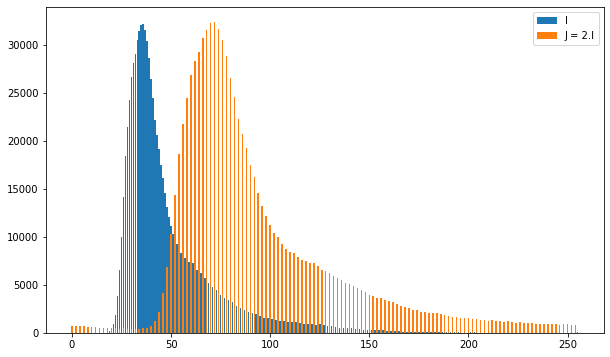

In [52]:
plt.rcParams["figure.figsize"] = (10,6)

plt.bar(hist_nasa_1[0], hist_nasa_1[1], label="I")
plt.bar(hist_nasa_1_a[0], hist_nasa_1_a[1], label="J = "+str(P)+".I")
plt.legend()

#### Observations
We clearly observe that intensities are scaled.

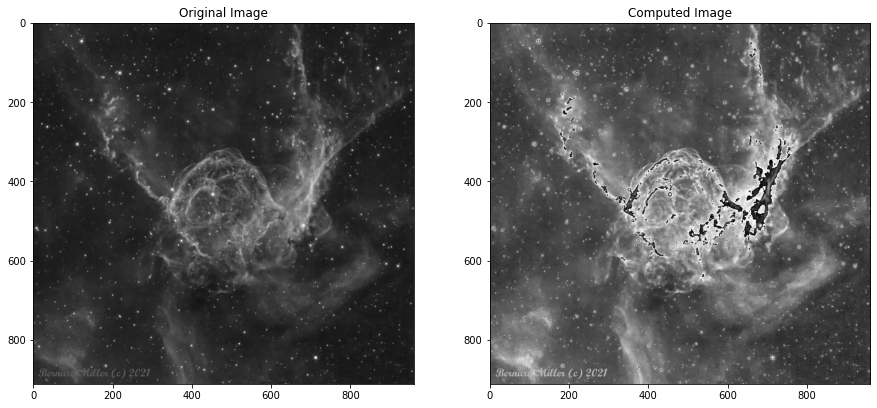

In [54]:
plt.rcParams["figure.figsize"] = (15,15)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_nasa_1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title("Computed Image")
plt.imshow(bin_nasa_1_a, cmap='gray', vmin=0, vmax=255)

### (b) J = I + L

In [111]:
isSame = True
for i in range(L, hist_nasa_1.shape[1]):
    if(hist_nasa_1[1, i-L] != hist_nasa_1_b[1, i]):
        isSame = False
        break
if isSame:
    print("Successfully verified according to relation discussed in class.")
else:
    print("Failed verification according to relation discussed in class.")

Successfully verified according to relation discussed in class.


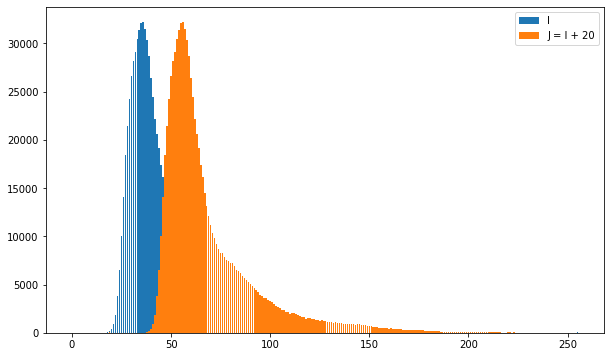

In [51]:
plt.rcParams["figure.figsize"] = (10,6)

plt.bar(hist_nasa_1[0], hist_nasa_1[1], label="I")
plt.bar(hist_nasa_1_b[0], hist_nasa_1_b[1], label="J = I"+" + " + str(L))
plt.legend()

#### Observations
We observe that intensities are not scaled but has a constant shift.

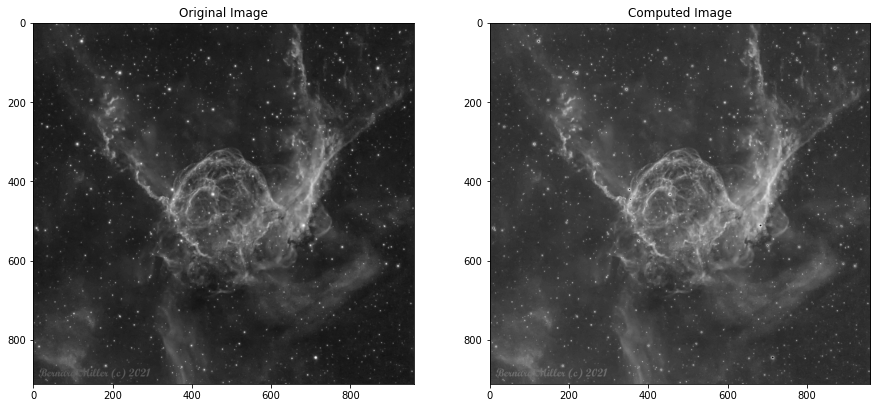

In [55]:
plt.rcParams["figure.figsize"] = (15, 15)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_nasa_1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title("Computed Image")
plt.imshow(bin_nasa_1_b, cmap='gray', vmin=0, vmax=255)

### (c) J = P.I + L

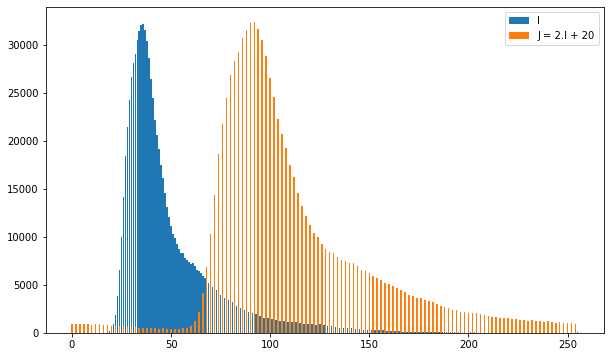

In [56]:
plt.rcParams["figure.figsize"] = (10,6)

plt.bar(hist_nasa_1[0], hist_nasa_1[1], label="I")
plt.bar(hist_nasa_1_c[0], hist_nasa_1_c[1], label="J = "+ str(P) + ".I"+" + " + str(L))
plt.legend()

#### Observations
We observe that intensities are scaled and also have a constant shift component.

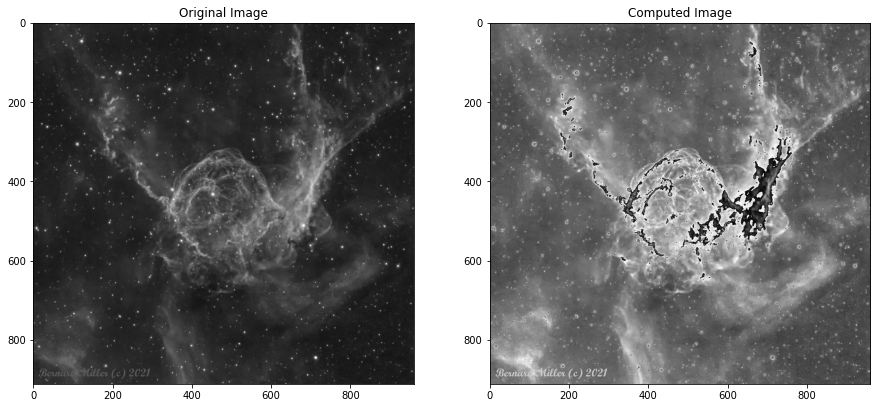

In [57]:
plt.rcParams["figure.figsize"] = (15, 15)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_nasa_1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title("Computed Image")
plt.imshow(bin_nasa_1_c, cmap='gray', vmin=0, vmax=255)

### Question 2
The function $\textit{FSCS}$ implements Full Scale Contrast Stretch

In [58]:
def FSCS(I):
    A = np.min(I)
    B = np.max(I)
    
    P = 255/(B-A)
    L = -1*A*P
    return linear_point(I, P, L)

In [59]:
fscs_nasa_1 = FSCS(img_nasa_1)
hist_fscs_nasa_1 = histogram(fscs_nasa_1)

<BarContainer object of 256 artists>

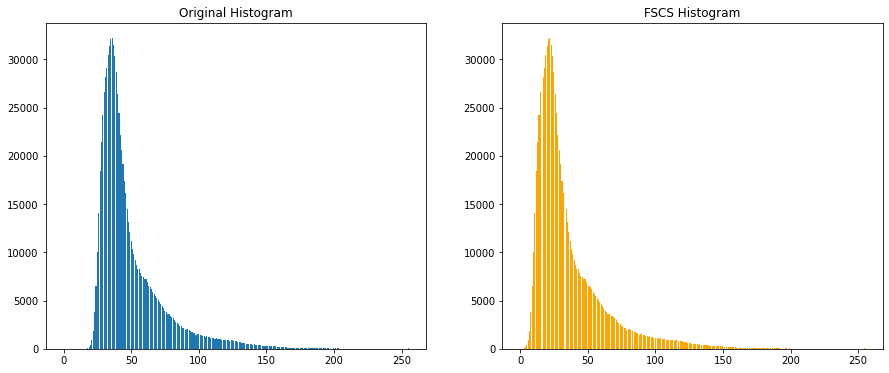

In [65]:
plt.rcParams["figure.figsize"] = (15,6)

plt.subplot(1, 2, 1)
plt.title("Original Histogram")
plt.bar(hist_nasa_1[0], hist_nasa_1[1])

plt.subplot(1, 2, 2)
plt.title("FSCS Histogram")
plt.bar(hist_fscs_nasa_1[0], hist_fscs_nasa_1[1], color="orange")

#### Observations
We can deduce from histgram plots that Original histogram has less number of pixels with intensities near 0 but where as in FSCS histogram we can see that the plot lies in whole region.\
These affects can be observed in below plots, were we see that in FSCS image we can observe more dark pixels.

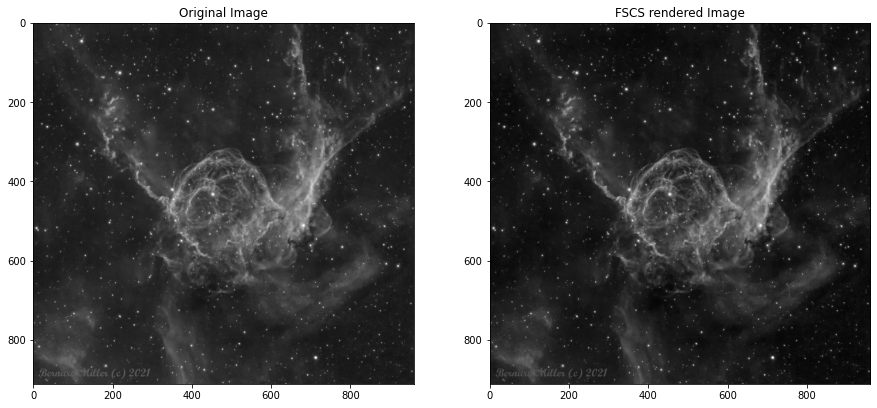

In [66]:
plt.rcParams["figure.figsize"] = (15, 15)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_nasa_1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title("FSCS rendered Image")
plt.imshow(fscs_nasa_1, cmap='gray', vmin=0, vmax=255)

### Question 3
The function $\textit{log_mag_compression}$ implements Log magnitude compression which includes FSCS also.

In [70]:
def log_mag_compression(I):
    J = np.log(1 + I.astype(int))
    return FSCS(J)

In [71]:
log_compre_nasa_1 = log_mag_compression(img_nasa_1)
hist_log_compre_nasa_1 = histogram(log_compre_nasa_1)

<BarContainer object of 960 artists>

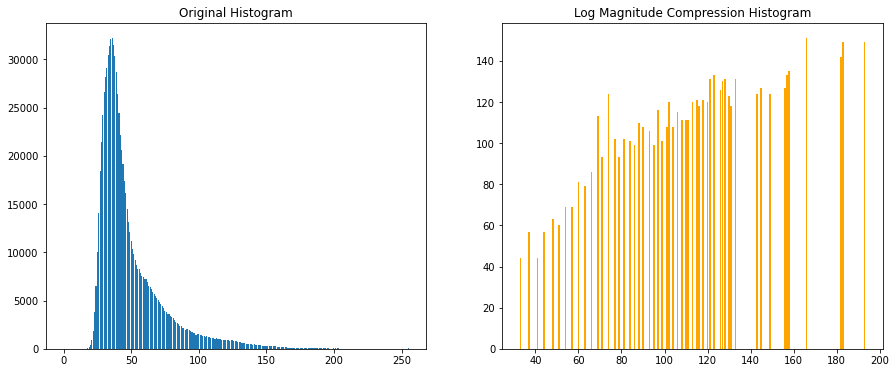

In [72]:
plt.rcParams["figure.figsize"] = (15,6)

plt.subplot(1, 2, 1)
plt.title("Original Histogram")
plt.bar(hist_nasa_1[0], hist_nasa_1[1])

plt.subplot(1, 2, 2)
plt.title("Log Magnitude Compression Histogram")
plt.bar(log_compre_nasa_1[0], log_compre_nasa_1[1], color="orange")

#### Observations
We can clearly see the nature of logarithm in above plots where higher intesity pixels are growing and dense, and less ones are sparse.\
The above explanation suits below rendered images. 

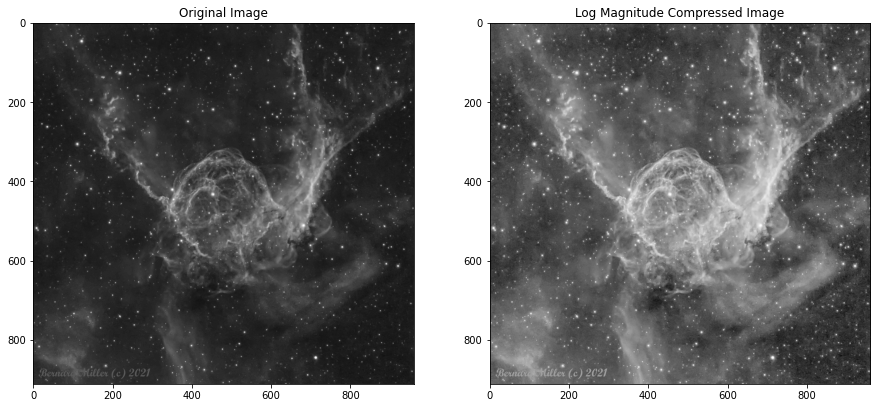

In [75]:
plt.rcParams["figure.figsize"] = (15, 15)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_nasa_1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title("Log Magnitude Compressed Image")
plt.imshow(log_compre_nasa_1, cmap='gray', vmin=0, vmax=255)

### Question 4
The function $\textit{gamma_correction}$ implements gamma correction which includes clipping of pixels intensities also.

In [76]:
def gamma_correction(I, gamma=1.4):
    return np.clip(np.power(I, gamma), 0, 255).astype(int)

In [77]:
gam_nasa_1 = gamma_correction(img_nasa_1)
hist_gam_nasa_1 = histogram(gam_nasa_1)

<BarContainer object of 256 artists>

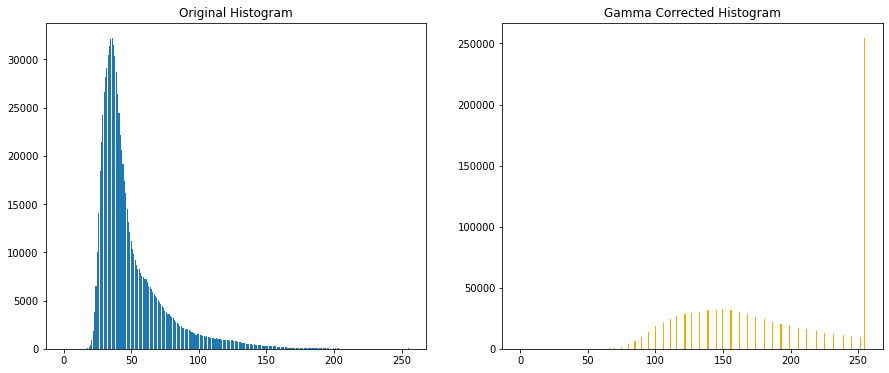

In [78]:
plt.rcParams["figure.figsize"] = (15,6)

plt.subplot(1, 2, 1)
plt.title("Original Histogram")
plt.bar(hist_nasa_1[0], hist_nasa_1[1])

plt.subplot(1, 2, 2)
plt.title("Gamma Corrected Histogram")
plt.bar(hist_gam_nasa_1[0], hist_gam_nasa_1[1], color="orange")

#### Observations
All pixel intensities are increased and most of them are clipped as 255 is the limit, this is expected behaviour of exponential functions.\
We can observe the affects in the gamma corrected image as most of the pixels are bright enough which makes the image to loose the essence of image.

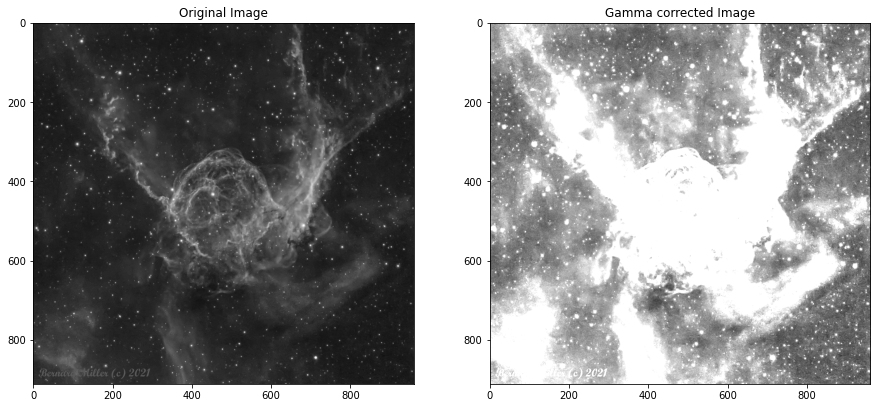

In [80]:
plt.rcParams["figure.figsize"] = (15, 15)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_nasa_1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title("Gamma corrected Image")
plt.imshow(gam_nasa_1, cmap='gray', vmin=0, vmax=255)

### Question 4
The function $\textit{histogram_flattener}$ flattens the histogram by applying Cummulative Distribuitive Function to image I, which in continous case should make the histgram flat.

In [83]:
def histogram_flattener(I):
    hist = histogram(I)
    cdf = hist[1]
    for i in range(1, 255):
        cdf[i] += cdf[i-1]
    cdf = cdf/(I.shape[0] * I.shape[1])
    J = cdf[I]
    J = FSCS(J)
    return J

In [84]:
hist_flat_nasa_1 = histogram_flattener(img_nasa_1)
hist_hist_flat_nasa_1 = histogram(hist_flat_nasa_1)

<BarContainer object of 256 artists>

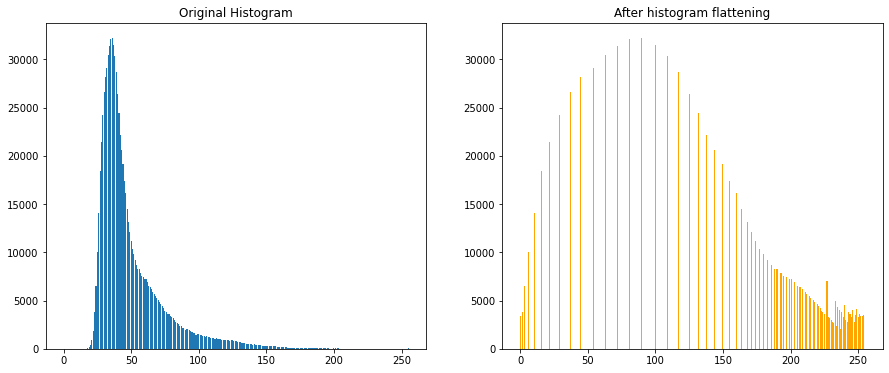

In [85]:
plt.rcParams["figure.figsize"] = (15,6)

plt.subplot(1, 2, 1)
plt.title("Original Histogram")
plt.bar(hist_nasa_1[0], hist_nasa_1[1])

plt.subplot(1, 2, 2)
plt.title("After histogram flattening")
plt.bar(hist_hist_flat_nasa_1[0], hist_hist_flat_nasa_1[1], color="orange")

#### Observations
As all these images are discrete so will be the histogram, thus we cannot perfectly obtain flat histogram but rather tend to be flat.

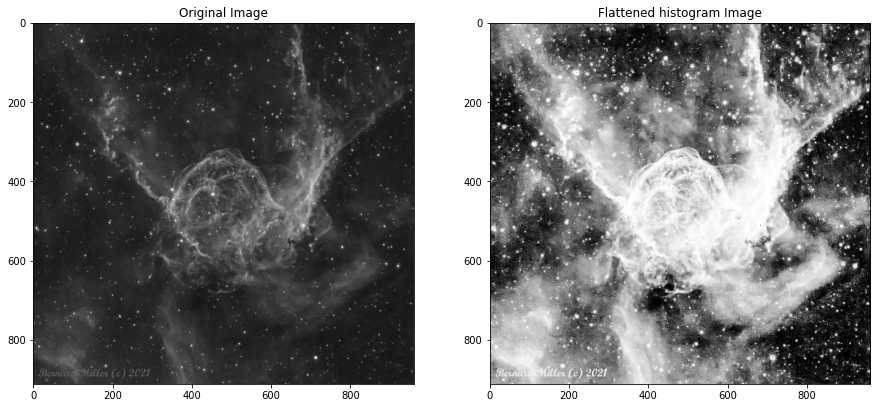

In [87]:
plt.rcParams["figure.figsize"] = (15, 15)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_nasa_1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title("Flattened histogram Image")
plt.imshow(hist_flat_nasa_1, cmap='gray', vmin=0, vmax=255)

## Image Zooming

### Question 1
The function $\textit{nearest_neighbour}$ implements nearest neighour algorithm which 1.5X Zoom .

In [93]:
def nearest_neighbour(I):
    M, N = I.shape
    image = np.zeros((int(1.5*M), int(1.5*N)))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i, j] = I[i//2, j//2]
    return image

In [94]:
%%time
z_img_nasa_2 = nearest_neighbour(img_nasa_2)
z_img_nasa_3 = nearest_neighbour(img_nasa_3)
z_img_nasa_4 = nearest_neighbour(img_nasa_4)

CPU times: user 1.55 s, sys: 12 ms, total: 1.56 s
Wall time: 1.56 s


### Question 1
The function $\textit{interpolate}$ computes coefficient A, B, C, D for by interpolating known pixels to rendered void pixels which are to be inserted in zoomed image.\
The function $\textit{bilinear_interpolation}$ expands the image by 1.5X and iterates over all 3x3 matrices and interpolates with smoothing assumption.

In [95]:
def interpolate(I, nearst_neighbours):
    M = np.array([[1, nearst_neighbours[0,0], nearst_neighbours[0,1], nearst_neighbours[0,0]*nearst_neighbours[0,1]],
                  [1, nearst_neighbours[1,0], nearst_neighbours[1,1], nearst_neighbours[1,0]*nearst_neighbours[1,1]],
                  [1, nearst_neighbours[2,0], nearst_neighbours[2,1], nearst_neighbours[2,0]*nearst_neighbours[2,1]],
                  [1, nearst_neighbours[3,0], nearst_neighbours[3,1], nearst_neighbours[3,0]*nearst_neighbours[3,1]]])
    
    return np.dot(np.linalg.inv(M), np.array([I[nearst_neighbours[0,0], nearst_neighbours[0,1]],
                                              I[nearst_neighbours[1,0], nearst_neighbours[1,1]],
                                              I[nearst_neighbours[2,0], nearst_neighbours[2,1]],
                                              I[nearst_neighbours[3,0], nearst_neighbours[3,1]]]).reshape(-1, 1))

def bilinear_interpolation(I):
    M, N = I.shape
    image = np.zeros((int(1.5*M), int(1.5*N)))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i, j] = I[i//2, j//2]
    for i in range(image.shape[0]-2):
        for j in range(image.shape[1]-2): 
            coeffs = interpolate(image, np.array([[i, j], [i + 2, j], [i, j + 2], [i + 2, j + 2]]))
            
            for p in range(2):
                for q in range(2):
                    IDX = np.array([1, i+p, j+q, (i+p)*(j+q)]).reshape(-1, 1)
                    image[i+p, j+q] = np.dot(coeffs.T, IDX)
    return image

In [97]:
%%time
bl_img_nasa_2 = bilinear_interpolation(img_nasa_2)
bl_img_nasa_3 = bilinear_interpolation(img_nasa_3)
bl_img_nasa_4 = bilinear_interpolation(img_nasa_4)

CPU times: user 12min 26s, sys: 6min 3s, total: 18min 30s
Wall time: 4min 39s


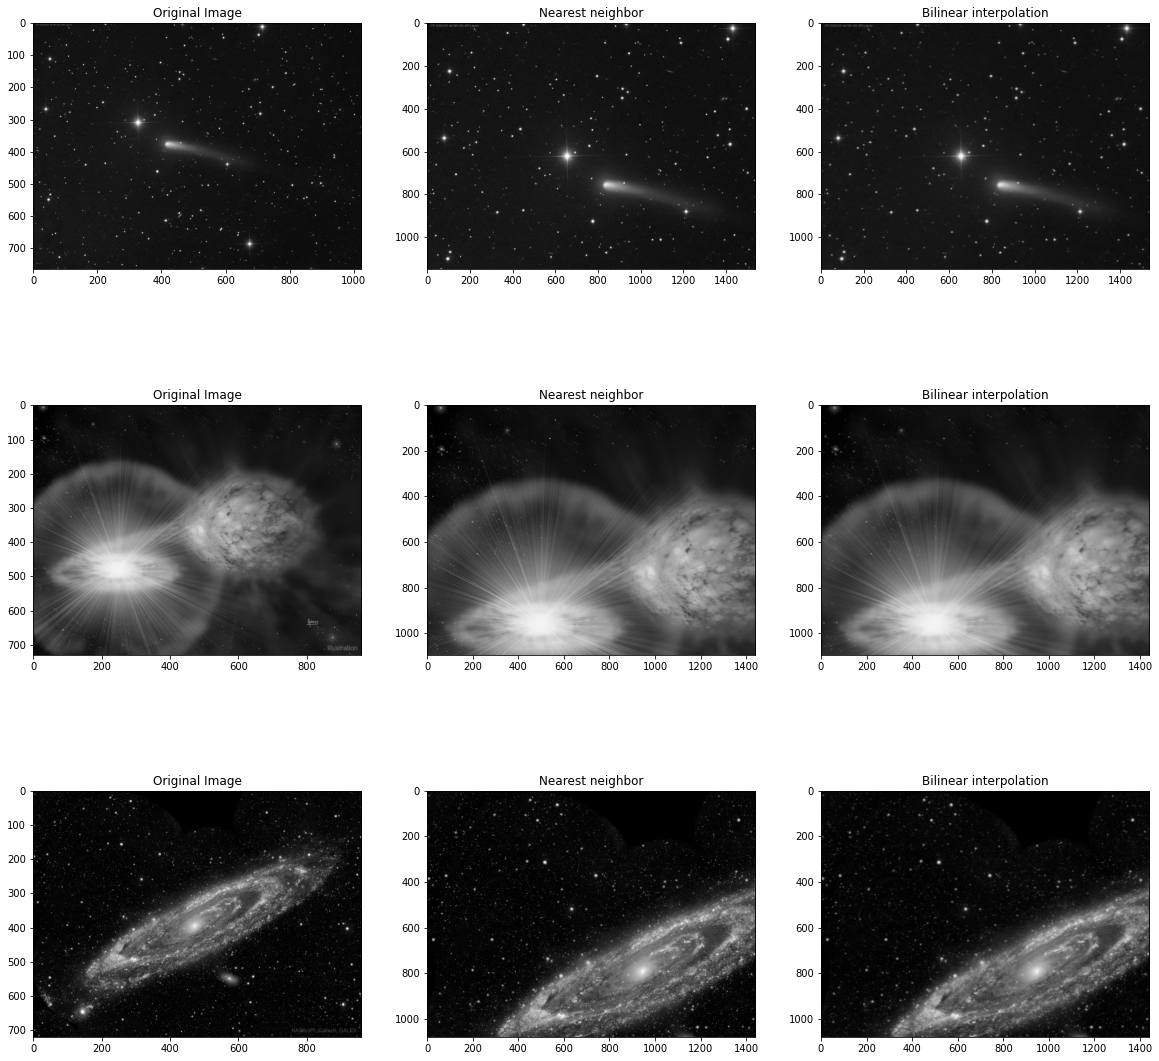

In [267]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(img_nasa_5, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 2)
plt.title("Nearest neighbor")
plt.imshow(z_img_nasa_5, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 3)
plt.title("Bilinear interpolation")
plt.imshow(bl_img_nasa_5, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 4)
plt.title("Original Image")
plt.imshow(img_nasa_6, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 5)
plt.title("Nearest neighbor")
plt.imshow(z_img_nasa_6, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 6)
plt.title("Bilinear interpolation")
plt.imshow(bl_img_nasa_6, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 7)
plt.title("Original Image")
plt.imshow(img_nasa_7, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 8)
plt.title("Nearest neighbor")
plt.imshow(z_img_nasa_7, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 9)
plt.title("Bilinear interpolation")
plt.imshow(bl_img_nasa_7, cmap='gray', vmin=0, vmax=255)


### Observations
Bilinear interpolation image observed to be more smooth than Nearest neighbor, but it all comes at a cost of computation.\
Bilinear interpolation takes 4min 39s for 3 images wheras Nearest neighbour takes 1.56s.\
Since there is matrix inversion and multiplication taking place for every 3X3 of size 4, which is of order $O(n^5)$, Now in total from my implementation complexity order is $O(n^2\left(1 + 1024 + 256\right))$ whereas Nearest neighbhour take only $O(n^2)$.

#### Disclaimer:- Time values mentioned aboved may vary CPU to CPU